In [363]:
import pandas as pd
import numpy as np
import pickle

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
sns.set()
import copy

d=open('subscribers','rb')
info4=pickle.load(d)
df=pd.DataFrame(info4)
g=open('engagement (1)','rb')
info1=pickle.load(g)
df1=pd.DataFrame(info1)
df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [364]:
df.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,language,payment_type
count,192054,191302,224079,227359,227628,227628,224984,214253,227628,227628,92050
unique,3,5,7,2,1,33,16,2,11,1,6
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,ar,Standard Charter
freq,111464,125129,89039,200902,227628,80251,119126,143921,227096,227628,38810


In [365]:
df.drop(['package_type','preferred_genre','intended_use','op_sys','country','attribution_technical','attribution_survey','op_sys','months_per_bill_period','account_creation_date','language','trial_end_date','payment_type'],axis=1,inplace=True)

In [366]:
df=df.dropna()


In [367]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [368]:
d=df1['subid'].unique()
app_opens=[]
cust_service_mssgs=[]
num_videos_more_than_30_seconds=[]
num_videos_rated=[]
num_series_started=[]

for i in d:
    group=df1['subid']==i
    #print(data[group])
    dgroup=df1[group]
   # print(i,sum(dgroup['item_count']))
   # print(i,dgroup['time'].unique())
    app_opens+=[sum(dgroup['app_opens'])]
    cust_service_mssgs+=[sum(dgroup['cust_service_mssgs'])]
    num_videos_more_than_30_seconds+=[sum(dgroup['num_videos_more_than_30_seconds'])]
    num_videos_rated+=[sum(dgroup['num_videos_rated'])]
    num_series_started+=[sum(dgroup['num_series_started'])]
    

In [369]:
engagementtotal={'subid':d,
     'app_opens':app_opens,
     'cust_service_mssgs':cust_service_mssgs,
     'num_videos_more_than_30_seconds':num_videos_more_than_30_seconds,
     'num_videos_rated':num_videos_rated,
     'num_series_started':num_series_started}
df1=pd.DataFrame(engagementtotal)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135019 entries, 0 to 135018
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            135019 non-null  int64  
 1   app_opens                        133407 non-null  float64
 2   cust_service_mssgs               133407 non-null  float64
 3   num_videos_more_than_30_seconds  133407 non-null  float64
 4   num_videos_rated                 133407 non-null  float64
 5   num_series_started               133407 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 6.2 MB


In [370]:
dfimprove=df1

In [371]:
dfimprove.dropna()
dfimprove['subid']=dfimprove['subid'].astype(str)


In [372]:
dfimprove

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,22349235,2.0,2.0,11.0,0.0,0.0
1,20848497,8.0,4.0,45.0,0.0,5.0
2,22680106,14.0,2.0,64.0,0.0,9.0
3,22478137,4.0,2.0,23.0,0.0,2.0
4,21899628,6.0,3.0,32.0,0.0,5.0
...,...,...,...,...,...,...
135014,29773608,7.0,3.0,28.0,0.0,4.0
135015,20699289,2.0,2.0,7.0,0.0,1.0
135016,27373263,26.0,6.0,66.0,0.0,6.0
135017,28409777,215.0,17.0,194.0,2.0,37.0


In [373]:
dfimprove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135019 entries, 0 to 135018
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            135019 non-null  object 
 1   app_opens                        133407 non-null  float64
 2   cust_service_mssgs               133407 non-null  float64
 3   num_videos_more_than_30_seconds  133407 non-null  float64
 4   num_videos_rated                 133407 non-null  float64
 5   num_series_started               133407 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.2+ MB


In [374]:
dfimprove['subid']=dfimprove['subid'].astype(int)

In [424]:
dfcom=pd.merge(dfimprove,df)
dfcom1=dfcom
dfcom1

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,...,plan_type,monthly_price,discount_price,creation_until_cancel_days,cancel_before_trial_end,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF
0,20848497,8.0,4.0,45.0,0.0,5.0,3.215606,20.051667,1.919271,False,...,base_uae_14_day_trial,4.7343,4.5141,13.0,False,False,0.0,0.0000,False,False
1,22680106,14.0,2.0,64.0,0.0,9.0,2.632371,18.601711,2.510018,False,...,base_uae_14_day_trial,4.7343,4.5141,21.0,True,False,0.0,0.0367,True,True
2,22478137,4.0,2.0,23.0,0.0,2.0,2.464469,27.301448,1.861209,False,...,base_uae_14_day_trial,4.7343,4.5141,4.0,False,False,0.0,0.0367,False,False
3,21899628,6.0,3.0,32.0,0.0,5.0,2.950499,31.651317,1.834642,False,...,base_uae_14_day_trial,4.7343,4.5141,5.0,False,False,0.0,0.0367,False,False
4,23185911,4.0,1.0,25.0,0.0,1.0,2.921040,20.051667,2.050120,False,...,base_uae_14_day_trial,4.7343,4.5141,11.0,False,False,0.0,0.0367,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53870,20383183,14.0,6.0,35.0,0.0,6.0,5.317317,27.301448,2.848980,False,...,base_uae_14_day_trial,4.7343,4.5141,6.0,False,False,0.0,0.3303,False,False
53871,29209684,9.0,4.0,28.0,0.0,3.0,3.819458,28.751405,2.382254,False,...,base_uae_14_day_trial,4.7343,4.5141,4.0,False,False,0.0,0.1101,False,False
53872,25880132,6.0,3.0,28.0,0.0,2.0,2.258273,22.951579,1.854872,False,...,base_uae_14_day_trial,4.7343,4.5141,4.0,False,False,0.0,0.0367,False,False
53873,29773608,7.0,3.0,28.0,0.0,4.0,2.817943,27.301448,1.873938,False,...,base_uae_14_day_trial,4.7343,4.5141,8.0,False,False,0.0,0.0000,False,False


In [425]:
dfcom.drop('initial_credit_card_declined',axis=1,inplace=True)

In [426]:
dfcom1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53875 entries, 0 to 53874
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subid                            53875 non-null  int64  
 1   app_opens                        53773 non-null  float64
 2   cust_service_mssgs               53773 non-null  float64
 3   num_videos_more_than_30_seconds  53773 non-null  float64
 4   num_videos_rated                 53773 non-null  float64
 5   num_series_started               53773 non-null  float64
 6   num_weekly_services_utilized     53875 non-null  float64
 7   weekly_consumption_hour          53875 non-null  float64
 8   num_ideal_streaming_services     53875 non-null  float64
 9   retarget_TF                      53875 non-null  bool   
 10  age                              53875 non-null  float64
 11  male_TF                          53875 non-null  object 
 12  plan_type         

In [427]:
dfcom1['retarget_TF']=dfcom1['retarget_TF'].astype(int)
dfcom1['cancel_before_trial_end']=dfcom1['cancel_before_trial_end'].astype(int)
dfcom1['paid_TF']=dfcom1['paid_TF'].astype(int)
dfcom1['refund_after_trial_TF']=dfcom1['refund_after_trial_TF'].astype(int)
dfcom1['male_TF']=dfcom1['male_TF'].astype(int)




dfcom1.info()
dfcom1=pd.get_dummies(dfcom1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53875 entries, 0 to 53874
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subid                            53875 non-null  int64  
 1   app_opens                        53773 non-null  float64
 2   cust_service_mssgs               53773 non-null  float64
 3   num_videos_more_than_30_seconds  53773 non-null  float64
 4   num_videos_rated                 53773 non-null  float64
 5   num_series_started               53773 non-null  float64
 6   num_weekly_services_utilized     53875 non-null  float64
 7   weekly_consumption_hour          53875 non-null  float64
 8   num_ideal_streaming_services     53875 non-null  float64
 9   retarget_TF                      53875 non-null  int64  
 10  age                              53875 non-null  float64
 11  male_TF                          53875 non-null  int64  
 12  plan_type         

In [428]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['paid_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['paid_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['paid_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [429]:
dfcom1.dropna(inplace=True)

In [430]:
dfcom1.isnull().sum()



subid                              0
app_opens                          0
cust_service_mssgs                 0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
num_weekly_services_utilized       0
weekly_consumption_hour            0
num_ideal_streaming_services       0
retarget_TF                        0
age                                0
male_TF                            0
monthly_price                      0
discount_price                     0
creation_until_cancel_days         0
cancel_before_trial_end            0
revenue_net                        0
join_fee                           0
paid_TF                            0
refund_after_trial_TF              0
plan_type_base_eur_14_day_trial    0
plan_type_base_uae_14_day_trial    0
plan_type_high_aud_14_day_trial    0
plan_type_high_sar_14_day_trial    0
plan_type_high_uae_14_day_trial    0
plan_type_low_gbp_14_day_trial     0
dtype: int64

In [431]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
xmin=minmax.fit(dfcom1).transform(dfcom1)
dfcom1=pd.DataFrame(xmin,columns=dfcom1.columns)
dfcom1

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,...,revenue_net,join_fee,paid_TF,refund_after_trial_TF,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
0,0.084846,0.009479,0.037736,0.097826,0.0,0.065789,0.322823,0.486486,0.507244,0.0,...,0.354023,0.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.268011,0.016588,0.018868,0.139130,0.0,0.118421,0.263363,0.472973,0.612786,0.0,...,0.354023,0.10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.247813,0.004739,0.018868,0.050000,0.0,0.026316,0.246246,0.554054,0.496871,0.0,...,0.354023,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.189961,0.007109,0.028302,0.069565,0.0,0.065789,0.295796,0.594595,0.492125,0.0,...,0.354023,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.318593,0.004739,0.009434,0.054348,0.0,0.013158,0.292793,0.486486,0.530621,0.0,...,0.354023,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53768,0.038313,0.016588,0.056604,0.076087,0.0,0.078947,0.537087,0.554054,0.673344,0.0,...,0.354023,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53769,0.920984,0.010664,0.037736,0.060870,0.0,0.039474,0.384384,0.567568,0.589960,0.0,...,0.354023,0.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53770,0.588021,0.007109,0.028302,0.060870,0.0,0.026316,0.225225,0.513514,0.495739,0.0,...,0.354023,0.10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53771,0.977378,0.008294,0.028302,0.060870,0.0,0.052632,0.282282,0.554054,0.499145,0.0,...,0.354023,0.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [432]:
dfcom1.drop('plan_type_low_gbp_14_day_trial',inplace=True,axis=1)

In [433]:
#churn model code
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import copy

df_train, df_test = model_selection.train_test_split(dfcom1, test_size=0.3)




In [434]:
y = 'paid_TF'
x=['app_opens','cust_service_mssgs','num_videos_more_than_30_seconds','num_videos_rated','num_series_started',
  'num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','retarget_TF','age','male_TF',
   'monthly_price','discount_price','creation_until_cancel_days','cancel_before_trial_end','revenue_net',
   'join_fee','refund_after_trial_TF','plan_type_base_eur_14_day_trial','plan_type_base_uae_14_day_trial','plan_type_high_aud_14_day_trial','plan_type_high_sar_14_day_trial','plan_type_high_uae_14_day_trial']
add_constant_TF = True

In [435]:
dfcom1['monthly_price'].value_counts()

0.666667    53660
1.000000      106
0.333333        4
0.400000        2
0.000000        1
Name: monthly_price, dtype: int64

In [436]:
if add_constant_TF:
    x.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)


x

['app_opens',
 'cust_service_mssgs',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'num_weekly_services_utilized',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'retarget_TF',
 'age',
 'male_TF',
 'monthly_price',
 'discount_price',
 'creation_until_cancel_days',
 'cancel_before_trial_end',
 'revenue_net',
 'join_fee',
 'refund_after_trial_TF',
 'plan_type_base_eur_14_day_trial',
 'plan_type_base_uae_14_day_trial',
 'plan_type_high_aud_14_day_trial',
 'plan_type_high_sar_14_day_trial',
 'plan_type_high_uae_14_day_trial',
 'const']

In [437]:
lpm_model = sm.OLS(endog=df_train[y], exog=df_train[x])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:                paid_TF   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.797e+04
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:27:42   Log-Likelihood:                 49350.
No. Observations:               37641   AIC:                        -9.866e+04
Df Residuals:                   37619   BIC:                        -9.847e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

         Current function value: 0.000690
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:                paid_TF   No. Observations:                37641
Model:                          Logit   Df Residuals:                    37617
Method:                           MLE   Df Model:                           23
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.9974
Time:                        17:28:49   Log-Likelihood:                -25.976
converged:                      False   LL-Null:                       -10169.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
app_opens                          -7.7464     13.429     -0.577     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


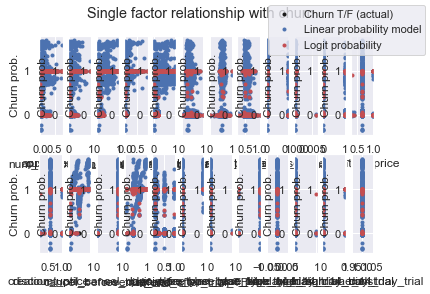

In [443]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y], exog=df_train[x])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x])

# plot predictions vs. data
select_plot_coef = [d for d in x if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['paid_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])


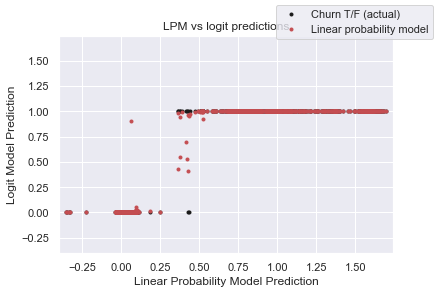

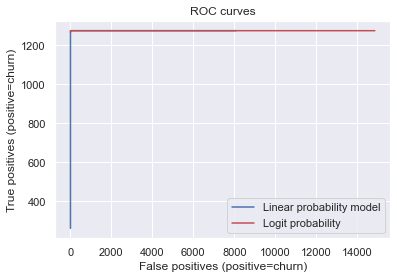

In [444]:
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['paid_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['paid_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['paid_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [451]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.25
threshold = 0.50
base_price = 15
discount_amount = 0.25
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


In [458]:
df_test['accept_offer_logit'].value_counts()

False    15811
True       321
Name: accept_offer_logit, dtype: int64

In [457]:
df_test

,const,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,...,random_draws,price_no_offer,accept_offer_prob,would_accept_offer_rand_draw,make_offer_lpm,accept_offer_lpm,price_lpm_offer,make_offer_logit,accept_offer_logit,price_logit_offer
16209,1.0,0.195646,0.009479,0.018868,0.052174,0.0,0.013158,0.390390,0.540541,0.594616,...,0.100076,15,1.0,True,False,False,15.0,False,False,15.0
47120,1.0,0.508161,0.090047,0.207547,0.136957,0.0,0.157895,0.261562,0.594595,0.500579,...,0.674937,15,1.0,True,False,False,15.0,False,False,15.0
52389,1.0,0.917745,0.022512,0.047170,0.102174,0.0,0.026316,0.240240,0.540541,0.501546,...,0.009376,15,1.0,True,False,False,15.0,False,False,15.0
12926,1.0,0.919153,0.005924,0.018868,0.060870,0.0,0.039474,0.311411,0.581081,0.510062,...,0.656307,15,1.0,True,False,False,15.0,False,False,15.0
45331,1.0,0.776500,0.010664,0.009434,0.091304,0.0,0.065789,0.233634,0.527027,0.496425,...,0.955392,15,1.0,True,False,False,15.0,False,False,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39030,1.0,0.212477,0.017773,0.056604,0.145652,0.0,0.157895,0.495496,0.513514,0.594445,...,0.385060,15,1.0,True,False,False,15.0,False,False,15.0
11524,1.0,0.530625,0.017773,0.066038,0.160870,0.0,0.157895,0.279580,0.527027,0.514547,...,0.668154,15,1.0,True,False,False,15.0,False,False,15.0
44874,1.0,0.643718,0.007109,0.018868,0.071739,0.0,0.039474,0.234234,0.513514,0.502723,...,0.633345,15,1.0,True,False,False,15.0,False,False,15.0
1870,1.0,0.994487,0.002370,0.028302,0.028261,0.0,0.013158,0.322523,0.594595,0.501179,...,0.244208,15,1.0,True,False,False,15.0,False,False,15.0


In [456]:
df_lift_threshold['logit_offer'].max()

0.0161024363979001

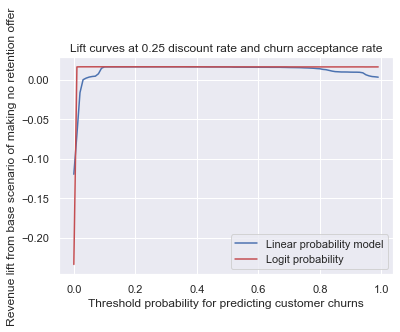

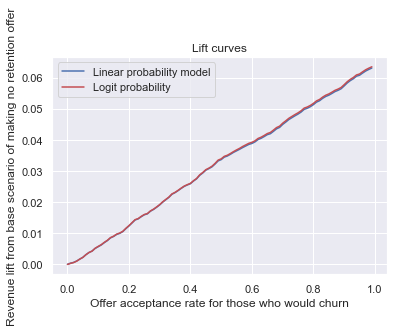

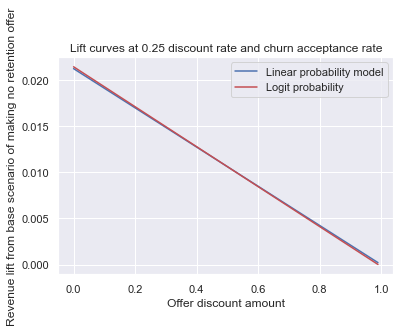

In [453]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves at 0.25 discount rate and churn acceptance rate')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves at 0.25 discount rate and churn acceptance rate')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
